# Predicting Forest Cover Types from Cartographic Variables

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns

In [28]:
forest = pd.read_table("data/covtype.data", sep=",")
cover_types = ['Spruce/fir','Lodgepole pine','Ponderosa pine','Cottonwood/willow','Aspen','Douglas-fir','Krummholz']

In [29]:
forest.columns = ['Elevation',
'Aspect',
'Slope',
'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
'Hillshade_9am',
'Hillshade_Noon',
'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points',
'Wilderness_Area1',
'Wilderness_Area2',
'Wilderness_Area3',
'Wilderness_Area4',
'Soil_Type1',
'Soil_Type2',
'Soil_Type3',
'Soil_Type4',
'Soil_Type5',
'Soil_Type6',
'Soil_Type7',
'Soil_Type8',
'Soil_Type9',
'Soil_Type10',
'Soil_Type11',
'Soil_Type12',
'Soil_Type13',
'Soil_Type14',
'Soil_Type15',
'Soil_Type16',
'Soil_Type17',
'Soil_Type18',
'Soil_Type19',
'Soil_Type20',
'Soil_Type21',
'Soil_Type22',
'Soil_Type23',
'Soil_Type24',
'Soil_Type25',
'Soil_Type26',
'Soil_Type27',
'Soil_Type28',
'Soil_Type29',
'Soil_Type30',
'Soil_Type31',
'Soil_Type32',
'Soil_Type33',
'Soil_Type34',
'Soil_Type35',
'Soil_Type36',
'Soil_Type37',
'Soil_Type38',
'Soil_Type39',
'Soil_Type40',
'Cover_Type']

In [30]:
print('Data Size:')
print('Number of Rows:', forest.shape[0])
print('Number of Attributes:', forest.shape[1])

Data Size:
Number of Rows: 581011
Number of Attributes: 55


In [31]:
print(forest.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
Elevation                             581011 non-null int64
Aspect                                581011 non-null int64
Slope                                 581011 non-null int64
Horizontal_Distance_To_Hydrology      581011 non-null int64
Vertical_Distance_To_Hydrology        581011 non-null int64
Horizontal_Distance_To_Roadways       581011 non-null int64
Hillshade_9am                         581011 non-null int64
Hillshade_Noon                        581011 non-null int64
Hillshade_3pm                         581011 non-null int64
Horizontal_Distance_To_Fire_Points    581011 non-null int64
Wilderness_Area1                      581011 non-null int64
Wilderness_Area2                      581011 non-null int64
Wilderness_Area3                      581011 non-null int64
Wilderness_Area4                      581011 non-null int64
Soil_Type1                            581011 non-

In [32]:
forest.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [33]:
# Checking how much skewed is data from normal distribution
print('Skewness of the below features:')
print(forest.skew())

Skewness of the below features:
Elevation                              -0.817602
Aspect                                  0.402625
Slope                                   0.789274
Horizontal_Distance_To_Hydrology        1.140436
Vertical_Distance_To_Hydrology          1.790248
Horizontal_Distance_To_Roadways         0.713678
Hillshade_9am                          -1.181144
Hillshade_Noon                         -1.063054
Hillshade_3pm                          -0.277052
Horizontal_Distance_To_Fire_Points      1.288636
Wilderness_Area1                        0.205622
Wilderness_Area2                        4.061591
Wilderness_Area3                        0.257819
Wilderness_Area4                        3.575557
Soil_Type1                             13.736658
Soil_Type2                              8.615351
Soil_Type3                             10.838621
Soil_Type4                              6.625170
Soil_Type5                             18.995227
Soil_Type6                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

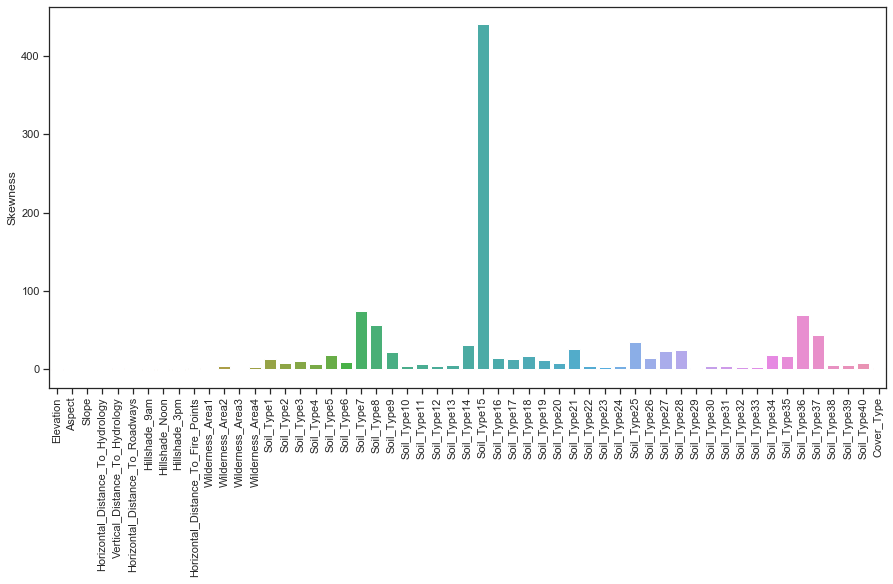

In [34]:
skew=forest.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)


In [35]:
# Some variables are too much right skewed, they may need to be treated later!

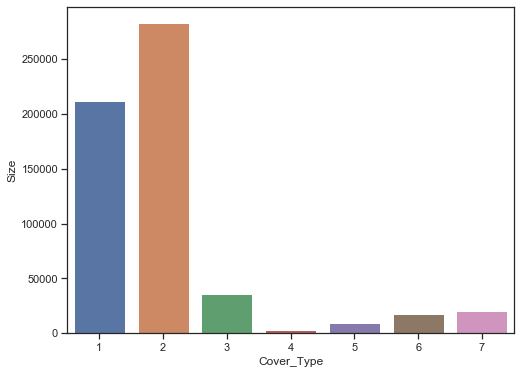

In [36]:
# class distribution

class_dist=forest.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

In [38]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i], cover_types[i])
    print('%.2f'% percent,'%')

Cover_Type 1 Spruce/fir
36.46 %
Cover_Type 2 Lodgepole pine
48.76 %
Cover_Type 3 Ponderosa pine
6.15 %
Cover_Type 4 Cottonwood/willow
0.47 %
Cover_Type 5 Aspen
1.63 %
Cover_Type 6 Douglas-fir
2.99 %
Cover_Type 7 Krummholz
3.53 %


In [ ]:
# Cover type 1 & 2 are most dominating  

In [42]:
# Coorelation 
# will check only non binary ( continuous variables).

# number of continuous features
size = 10 

#select first 10 columns from our dataset
data=forest.iloc[:,:size] 

#All columns
cols=data.columns 

# calculating pearsons's co-efficient for all combination of continous variables.
data_corr = data.corr()


print('-------------------------------')

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#fetch the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA


-------------------------------
Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


/usr/local/Cellar/python/3.7.4/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


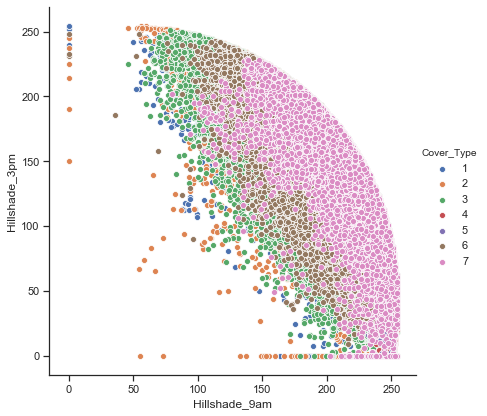

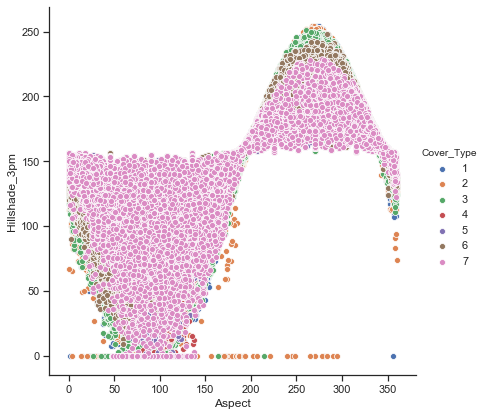

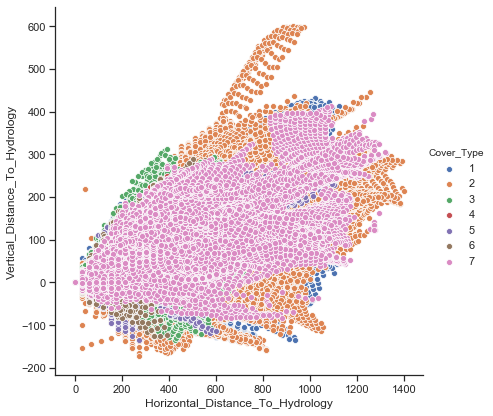

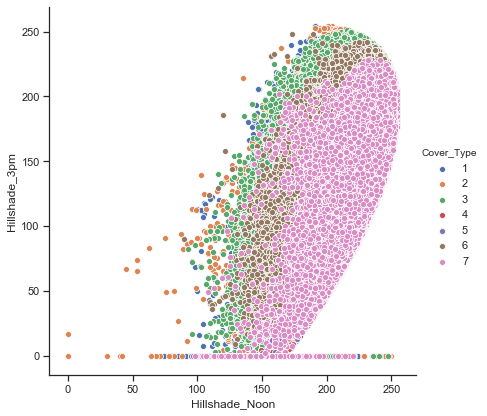

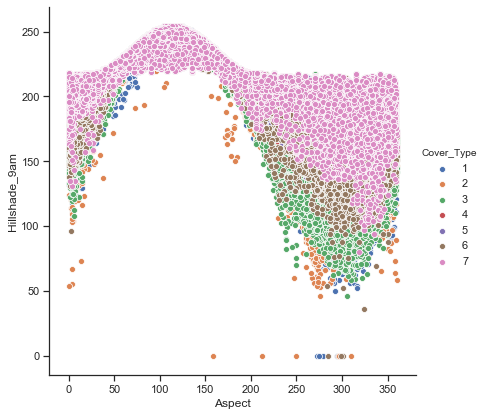

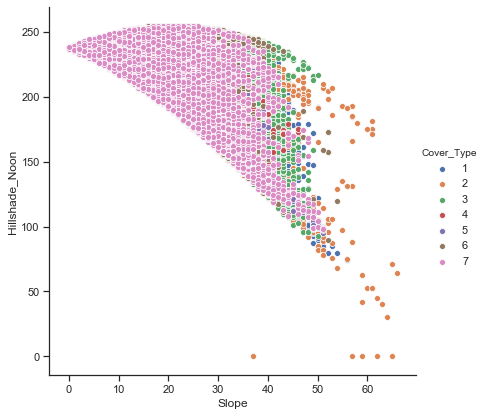

In [44]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(forest, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

# The color of each point, represents its cover type
# It can be seen that cover type are dominated with, cover type 1 & 2. 
# Hillshade patterns give a nice ellipsoid patterns with each other
# Aspect and Hillshades attributes form a sigmoid pattern
# Horizontal and vertical distance to hydrology give an almost linear pattern.


In [45]:
# check binary data types

binary_data=forest.loc[:,'Wilderness_Area1':'Soil_Type40']
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260795
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551127
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327647
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544043
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577980
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573486
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576188
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568615
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579414
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574436
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580906
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580832
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579864
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548377
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568601
1 

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

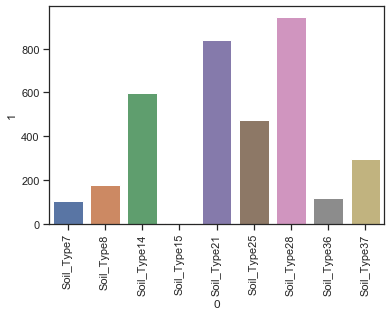

In [53]:
# Check binary variables that have less than 1000 occurences

counts_less = []

print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)
        counts_less.append([col,count])

df_occurence = pd.DataFrame.from_records(counts_less)

sns.barplot(x=df_occurence[0],y=df_occurence[1],data=df_occurence)
plt.xticks(rotation=90)

In [54]:
#the above histogram represents the occurences of different soil types and we can observe that the soil type 
#15 only has 3 occurences and its the most skewed out of all the soil types.
#We can potentially remove this since its not adding any useful input to our analysis. 

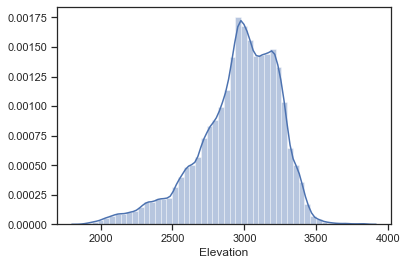

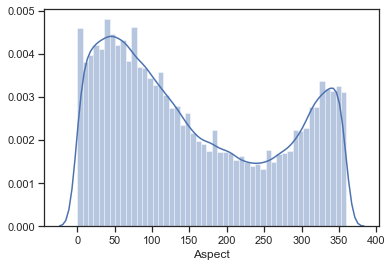

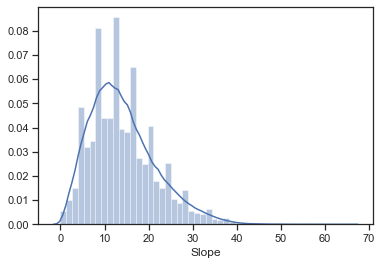

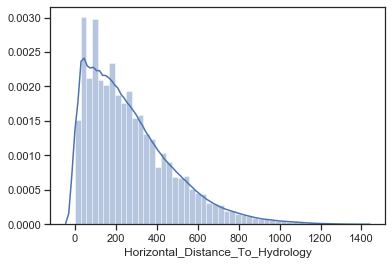

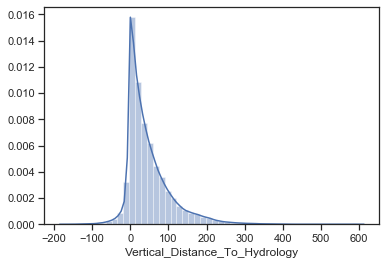

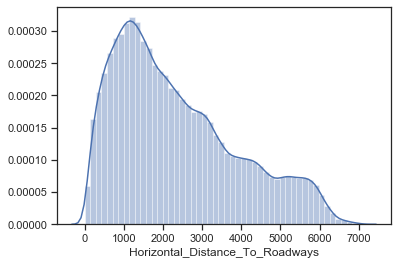

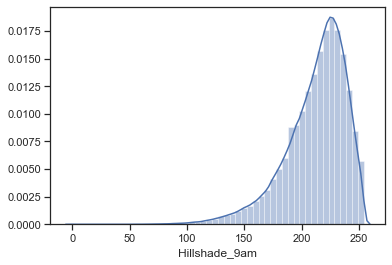

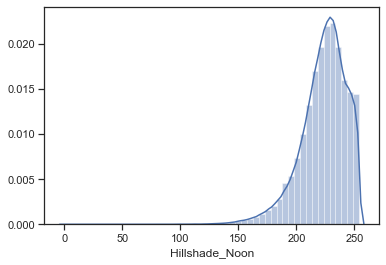

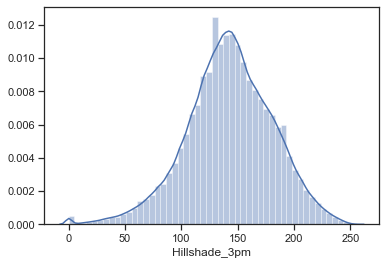

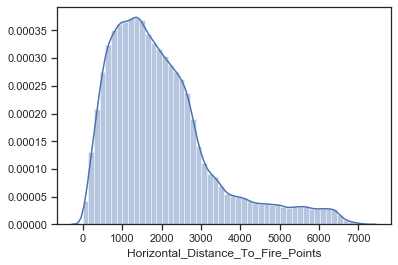

In [55]:
cont_data = forest.loc[:, 'Elevation':'Horizontal_Distance_To_Fire_Points']
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

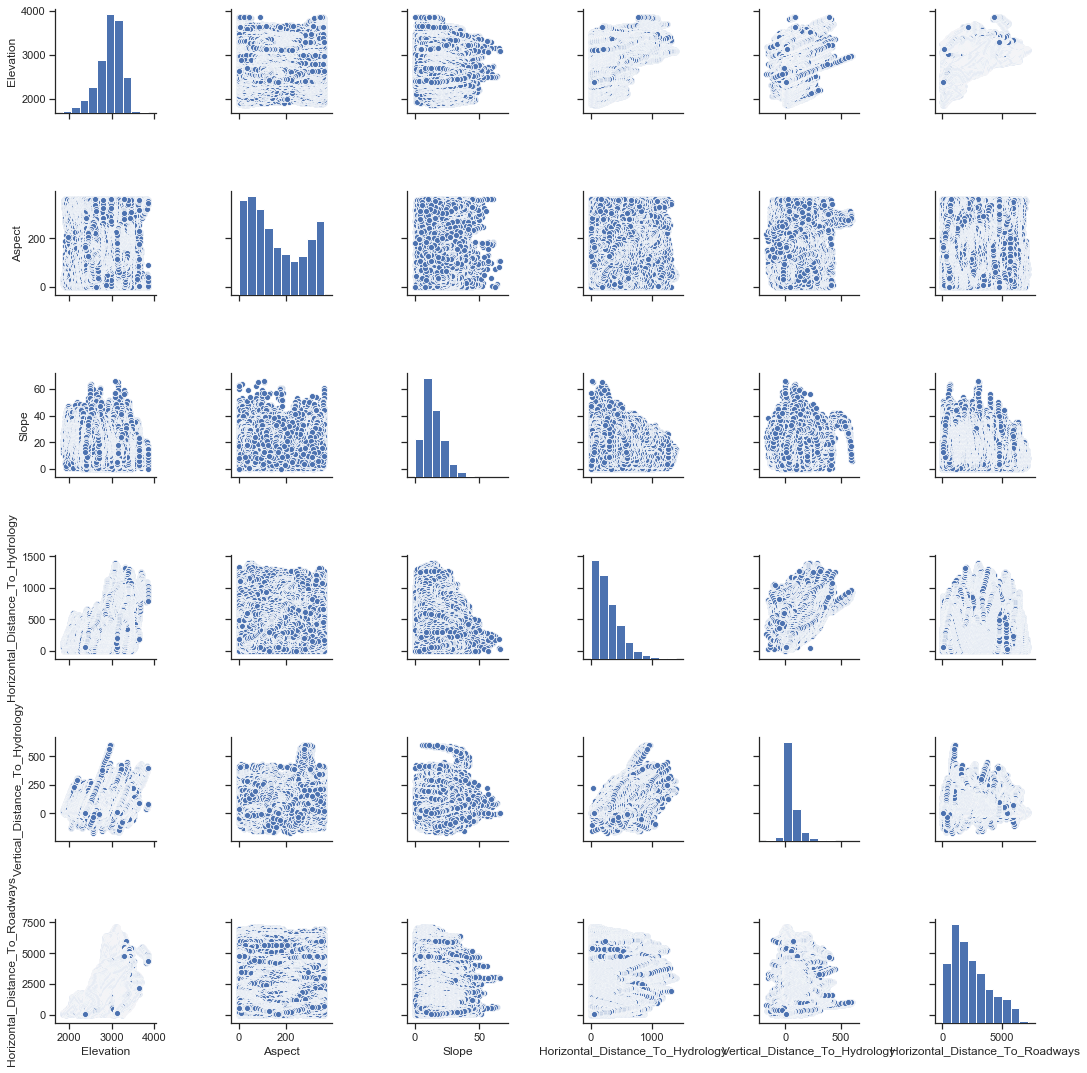

In [11]:
# sns.set(style="ticks")
# sns.pairplot(forest.iloc[:,0:6])